### Imports


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


### Data load


In [15]:

# Load data
df = pd.read_csv("data/Insta.csv")
X = df[['Instagram visit score', 'Spending_rank(0 to 100)']]


### Deciding optimal number of clusters with elbow method


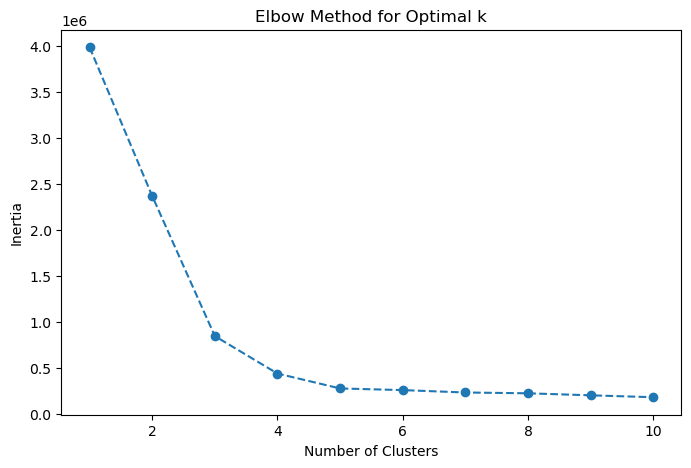

In [16]:

# Finding the optimal number of clusters using Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



### Model Training and Visualization


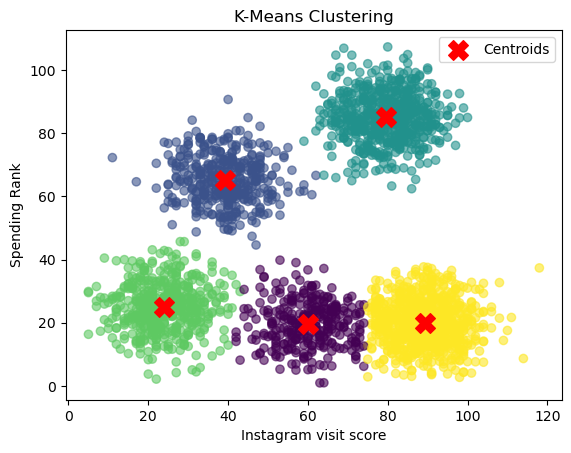

In [17]:
# Applying K-Means with k=3 (assuming optimal from the elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Instagram visit score')
plt.ylabel('Spending Rank')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
